<a href="https://colab.research.google.com/github/iamharkirat/business_intelligence/blob/main/Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Directory, Libraries and data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [4]:
#load the data
df = pd.read_csv("/content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model/CreditCard.csv")
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#Data Preparation

In [5]:
#Transform character variables
df = pd.get_dummies(df, drop_first = True)
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0


#Gaussian Mixture Model

Text(0.5, 0, 'Number of Components')

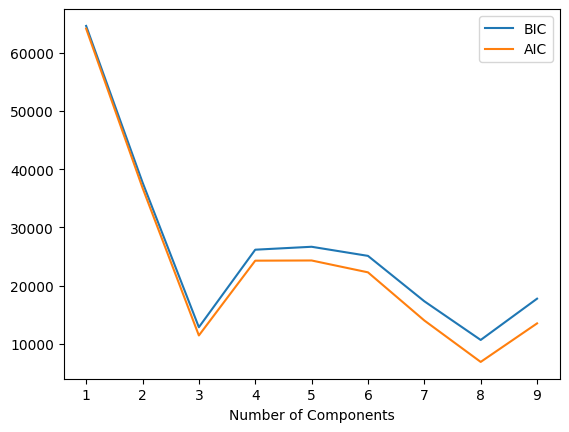

In [6]:
#Finding optimal number of clusters
#Prepare
n_components = np.arange(1,10)

#Create GMM model
models = [GaussianMixture(n_components= n,
                          random_state = 1502).fit(df) for n in n_components]

#Plot
plt.plot(n_components,
         [m.bic(df) for m in models],
         label = 'BIC')
plt.plot(n_components,
         [m.aic(df) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('Number of Components')

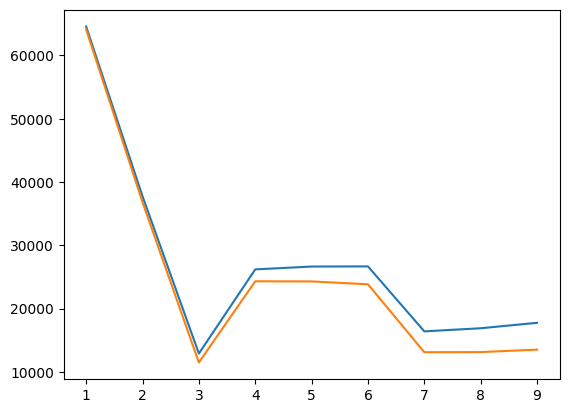

In [10]:
#Finding optimal number of clusters
#Prepare
c_components = np.arange(1,10)

#Create GMM model
models = [GaussianMixture(n_components = n,
                          random_state = 42).fit(df) for n in n_components]

#Plot
plt.plot(n_components,
         [m.bic(df) for m in models],
         label = 'BIC')

plt.plot(n_components,
         [m.aic(df) for m in models],
         label = 'AIC')

In [11]:
#Gaussian Mixture Model
model = GaussianMixture(n_components= 3,
                        random_state = 1502).fit(df)

#Interpretation

In [12]:
#Predict the cluster for each customer
cluster = pd.Series(model.predict(df))

In [13]:
#Create Cluster variable
df['cluster'] = cluster
df.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,cluster
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0,2
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0,2
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0,2
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0,2
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0,2


In [14]:
#Check how many people per cluster
df.cluster.value_counts()

2    720
1    303
0    296
Name: cluster, dtype: int64

In [15]:
#Interpretation
pd.DataFrame(model.means_,
             columns = list(df.iloc[:,:-1].columns))

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.0,0.304054,0.094595
1,0.435644,34.909241,3.549702,0.088288,242.607480,1.013201,68.000000,0.458746,7.379538,1.0,0.504950,0.207921
2,0.000000,32.503472,3.409851,0.088563,236.916958,0.951389,49.895833,1.000000,7.223611,1.0,0.469444,0.000000


In [ ]:
#Names
#Cluster 0: Non-Credit Users
#Cluster 1: Successful Entrepreneurs
#Cluster 2: young employees